In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_moons
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

def polynomial_kernel(X, Y):
    return (X @ Y.T + 1) ** 2

X, y = make_moons(n_samples=300, noise=0.2, random_state=42)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

K_train = polynomial_kernel(X_train, X_train)
K_test = polynomial_kernel(X_test, X_train)

Custom Kernel Accuracy: 0.8500
Polynomial Kernel Accuracy: 0.8667
RBF Kernel Accuracy: 0.9333


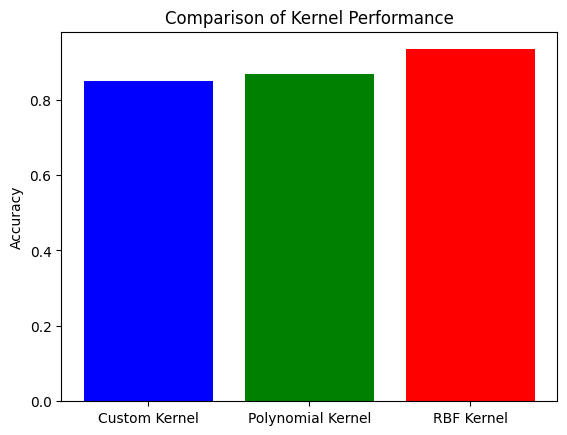

In [2]:
svm_custom = SVC(kernel='precomputed')
svm_custom.fit(K_train, y_train)
y_pred_custom = svm_custom.predict(K_test)
acc_custom = accuracy_score(y_test, y_pred_custom)

svm_poly = SVC(kernel='poly', degree=2, coef0=1)
svm_poly.fit(X_train, y_train)
y_pred_poly = svm_poly.predict(X_test)
acc_poly = accuracy_score(y_test, y_pred_poly)

svm_rbf = SVC(kernel='rbf')
svm_rbf.fit(X_train, y_train)
y_pred_rbf = svm_rbf.predict(X_test)
acc_rbf = accuracy_score(y_test, y_pred_rbf)

print(f"Custom Kernel Accuracy: {acc_custom:.4f}")
print(f"Polynomial Kernel Accuracy: {acc_poly:.4f}")
print(f"RBF Kernel Accuracy: {acc_rbf:.4f}")

plt.bar(["Custom Kernel", "Polynomial Kernel", "RBF Kernel"], [acc_custom, acc_poly, acc_rbf], color=['blue', 'green', 'red'])
plt.ylabel("Accuracy")
plt.title("Comparison of Kernel Performance")
plt.show()